## Car Scraping Project
This project I will scrape car data from popular canadian car websites such as carpages, kijijiautos and autotrader

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [5]:
website = "https://www.cars.com/shopping/results/?stock_type=cpo&makes%5B%5D=mercedes_benz&models%5B%5D&list_price_max&maximum_distance=all&zip"
response = requests.get(website) # we get the website from beautiful soup
response.status_code # 200 means we can make a sucessfull HTTP request to the site

200

In [1]:
from PIL import Image
import cv2
import numpy as np
import requests

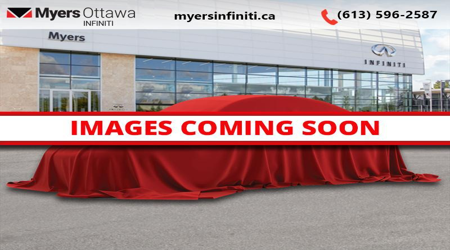

In [3]:
file = "kia2023.jpg"
image = Image.open(file)
image = image.resize((450,250))
image_arr = np.array(image)
image

In [9]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

4  cars found


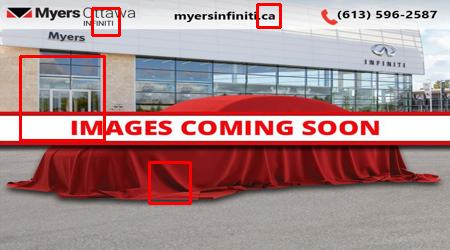

In [10]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)